In [4]:
# urllib = url인코딩 할때 필요한 라이브러리
import urllib.parse

import pandas as pd

MARKET_CODE_DICT = {

    'kospi': 'stockMkt',
    'kosdaq': 'kosdaqMkt',
    'konex': 'konexMkt'
}

DOWNLOAD_URL = 'https://kind.krx.co.kr/corpgeneral/corpList.do'

def zeroFill(columnValue):
    columnValue = str(columnValue)
    outValue = columnValue.zfill(6)
    return outValue

def get_stock_codes(market=None, delisted=False):
    params = {'method': 'download'}
    if market.lower() in MARKET_CODE_DICT:

        ## marketType 키 추가
        params['marketType'] = MARKET_CODE_DICT[market]
        print(market.lower()+" market key is exist")
    else:
        print("invalid market")

    # make url  key=value & key = value
    params_string = urllib.parse.urlencode(params)
    request_url = DOWNLOAD_URL+"?"+params_string
    df = pd.read_html(request_url)[0]
    #     df["종목코드"] = df.종목코드.map('{:06d}'.format) # 동일 결과
    df["종목코드"] = df.종목코드.apply(zeroFill)
 
    return df

stocks = get_stock_codes('kospi')

stocks.head(5)

stock_code = stocks.iloc[0]['종목코드']
stock_name = stocks.iloc[0]['회사명']
print(stock_name)
print(stock_code)

# 종목코드 불러오기
wantCode = stocks[stocks['회사명'] == '삼성전자'].iloc[0]
finalCode = wantCode[1]
finalCode

kospimarket key is exist
DRB동일
004840


'005930'

In [5]:
stockInput = input()
targetCode = '종목코드'
temp = ''
# 종목코드 불러오기
for i in range(0,len(stocks)):
    stock_code = stocks.iloc[i][targetCode]
    stock_name = stocks.iloc[i]['회사명']
    if stock_name == stockInput:
        temp = stock_name
        print(stock_code)
        break
    if(i == len(stocks)-1)and(temp == ""): 
        print('입력오류')

 카카오


035720


In [93]:
import FinanceDataReader as web
from datetime import date, timedelta 
import datetime

end = date.today()
start = date.today() - timedelta(70)
# start = date.today() and datetime.datetime(2019,4,1)

STOCK = web.DataReader(stock_code, start, end)
STOCK['Date'] = STOCK.index
STOCK

,Open,High,Low,Close,Volume,Change,Date
Date,,,,,,,
2021-03-25,98349,98549,96744,97347,388531,-0.014228,2021-03-25
2021-03-26,97948,99353,97547,99354,384547,0.020617,2021-03-26
2021-03-29,99555,99655,97347,97849,349113,-0.015148,2021-03-29
2021-03-30,98350,99754,98249,99053,311073,0.012305,2021-03-30
2021-03-31,99153,101360,98550,99956,503036,0.009116,2021-03-31
2021-04-01,100357,101159,98751,100157,412423,0.002011,2021-04-01
2021-04-02,101964,101964,100157,100559,298641,0.004014,2021-04-02
2021-04-05,100959,101360,100357,100759,310400,0.001989,2021-04-05
2021-04-06,101561,109389,101361,109189,1724958,0.083665,2021-04-06


# 주가 데이터 시각화

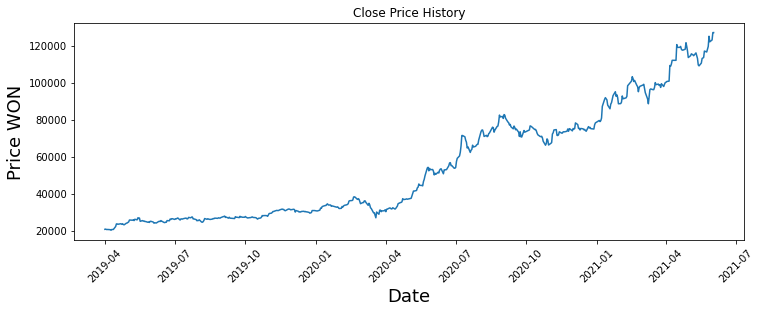

In [26]:
import matplotlib.pyplot as plt
import yfinance as yf

# start = yf.download
plt.figure(figsize=(12,4))
plt.plot(STOCK['Close'], label='Close')
plt.xticks(rotation=45)
plt.title('Close Price History')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price WON', fontsize=18)
plt.show()

# OBV 계산하기

In [45]:
OBV = []
OBV.append(0)
for i in range(1, len(STOCK.Close)):
    if STOCK.Close[i] > STOCK.Close[i-1]:
        OBV.append(OBV[-1] + STOCK.Volume[i])
    elif STOCK.Close[i] < STOCK.Close[i-1]:
        OBV.append(OBV[-1] - STOCK.Volume[i])
    else:
        OBV.append(OBV[-1])

# OBV와 지수 이동 평균을 새로운 컬럼에 추가하기

In [88]:
STOCK['OBV'] = OBV
STOCK['OBV_EMA'] = STOCK['OBV'].ewm(span=3).mean()
STOCK

,Open,High,Low,Close,Volume,Change,OBV,OBV_EMA
Date,,,,,,,,
2021-03-24,97647,98751,96744,98752,288563,0.003057,0,0.000000e+00
2021-03-25,98349,98549,96744,97347,388531,-0.014228,-388531,-2.590207e+05
2021-03-26,97948,99353,97547,99354,384547,0.020617,-3984,-1.132854e+05
2021-03-29,99555,99655,97347,97849,349113,-0.015148,-353097,-2.411849e+05
2021-03-30,98350,99754,98249,99053,311073,0.012305,-42024,-1.383922e+05
2021-03-31,99153,101360,98550,99956,503036,0.009116,461012,1.660671e+05
2021-04-01,100357,101159,98751,100157,412423,0.002011,873435,5.225360e+05
2021-04-02,101964,101964,100157,100559,298641,0.004014,1172076,8.485796e+05
2021-04-05,100959,101360,100357,100759,310400,0.001989,1482476,1.166148e+06


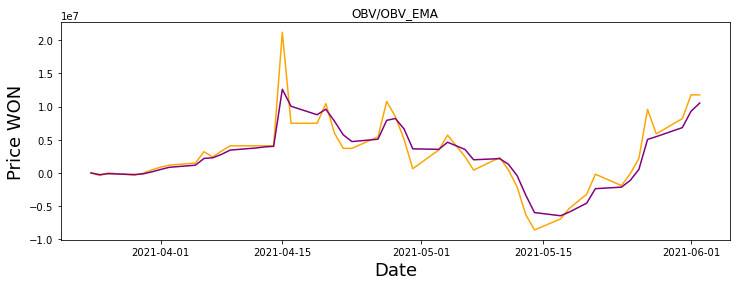

In [91]:
plt.figure(figsize=(12,4))
plt.plot(STOCK['OBV'], label='OBV', color='orange')
plt.plot(STOCK['OBV_EMA'], label='OBV_EMA', color='purple')
plt.title('OBV/OBV_EMA')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price WON', fontsize=18)
###########ylabel두줄 알아내기
plt.show()